In [1]:
from google.colab import drive
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from matplotlib.font_manager import FontProperties

### upload 'shhs1-dataset-0.20.0 (1).csv' and 'shhs2-dataset-0.20.0.csv'

In [2]:
shhs1 = pd.read_csv('shhs1-dataset-0.20.0 (1).csv', error_bad_lines=False)

<ipython-input-2-92787a90349c>:1: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  shhs1 = pd.read_csv('shhs1-dataset-0.20.0 (1).csv', error_bad_lines=False)
<ipython-input-2-92787a90349c>:1: DtypeWarning: Columns (1214) have mixed types. Specify dtype option on import or set low_memory=False.
  shhs1 = pd.read_csv('shhs1-dataset-0.20.0 (1).csv', error_bad_lines=False)


In [3]:
shhs1.shape

(5804, 1271)

In [4]:
shhs2 = pd.read_csv('shhs2-dataset-0.20.0.csv', sep=',', encoding='latin-1')

<ipython-input-4-0ba122a354f1>:1: DtypeWarning: Columns (1216) have mixed types. Specify dtype option on import or set low_memory=False.
  shhs2 = pd.read_csv('shhs2-dataset-0.20.0.csv', sep=',', encoding='latin-1')


In [5]:
shhs2.shape

(4311, 1274)

Dataset: events, domains, forms, variables, harmonized, followup, shhs1, shhs2

# EDA

In [6]:
# Function to add median labels
def add_median_labels(median, ax, dataset, right_amt=1.1):
    if dataset == 'shhs1':
      ax.text(median * right_amt, ax.get_ylim()[1] * 0.95, f'Median ({dataset}): {median:.2f}', color='red', ha='left', fontsize=10)
    else:
      ax.text(median * right_amt, ax.get_ylim()[1] * 0.91, f'Median ({dataset}): {median:.2f}', color='red', ha='left', fontsize=10)

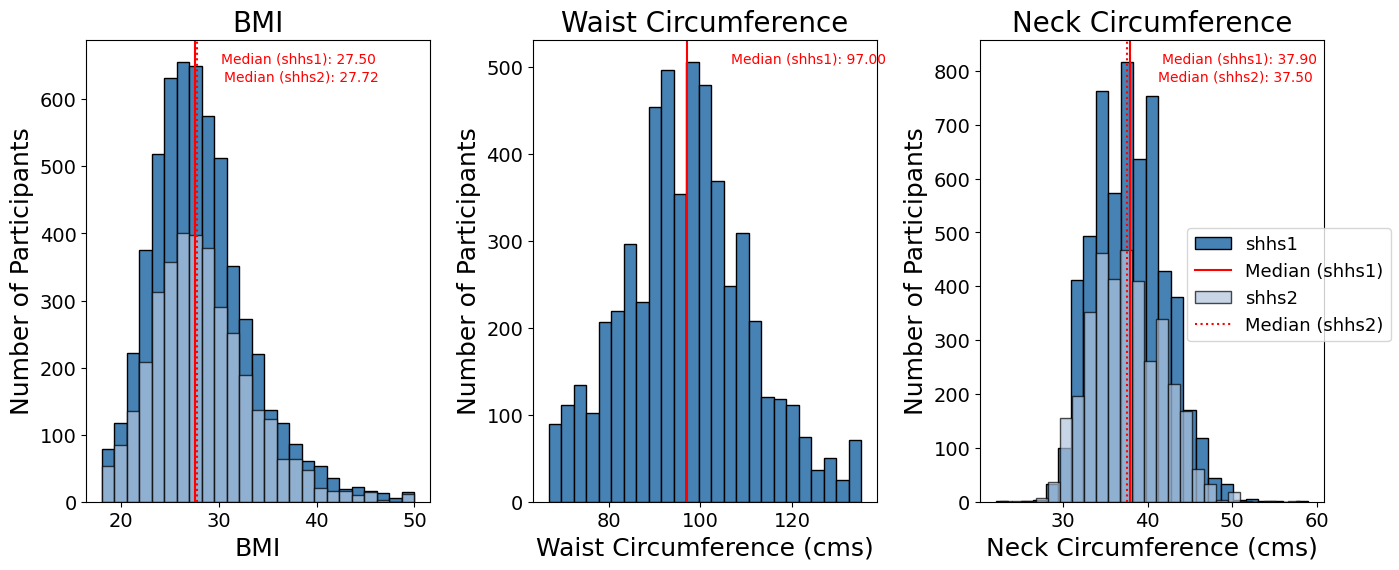

In [7]:
fig, ax = plt.subplots(1, 3, figsize=(15, 6))

# Common function to plot histogram and median
def plot_histogram(axis, data_s1, title, xlabel, data_s2=None):
    # Plotting for the first dataset (shhs1)
    median_s1 = data_s1.median()
    axis.hist(data_s1, bins=25, alpha=1, edgecolor='black', color='steelblue', label='shhs1')
    axis.axvline(median_s1, color='red', linestyle='-', label='Median (shhs1)')
    add_median_labels(median_s1, axis, 'shhs1')

    # Plotting for the second dataset (shhs2) if provided
    if data_s2 is not None:
        median_s2 = data_s2.median()
        axis.hist(data_s2, bins=25, alpha=0.7, edgecolor='black', color='lightsteelblue', label='shhs2')
        axis.axvline(median_s2, color='red', linestyle=':', label='Median (shhs2)')
        add_median_labels(median_s2, axis, 'shhs2')

    axis.set_title(title, fontsize=20)
    axis.set_xlabel(xlabel, fontsize=18)
    axis.set_ylabel('Number of Participants', fontsize=18)  # Set Y-axis label
    axis.tick_params(axis='both', labelsize=14)  # Set tick label font size

# Plot for BMI
plot_histogram(ax[0], shhs1['bmi_s1'], "BMI", "BMI", shhs2['bmi_s2'])

# Plot for Waist circumference (with only shhs1 data)
plot_histogram(ax[1], shhs1['waist'], "Waist Circumference", "Waist Circumference (cms)")

# Plot for Neck circumference
plot_histogram(ax[2], shhs1['neck20'], "Neck Circumference", "Neck Circumference (cms)", shhs2['pm212a'])

# Consolidate legends with increased font size
handles, labels = ax[0].get_legend_handles_labels()
fig.legend(handles, labels, loc='right', fontsize=13)

# Adjust layout
plt.subplots_adjust(right=0.95, wspace=0.3)

# Show plot
plt.savefig('body measurement.jpg', format='jpg', dpi=300, bbox_inches='tight', pad_inches=0.1)

In [8]:
# define CSA patient severity
csa_1 = shhs1[(shhs1['ahi_c0h4'] >= 5) & (shhs1['ahi_c0h4'] > shhs1['ahi_o0h4'])]
csa_2 = shhs2[(shhs2['ahi_c0h4'] >= 5) & (shhs2['ahi_c0h4'] > shhs2['ahi_o0h4'])]

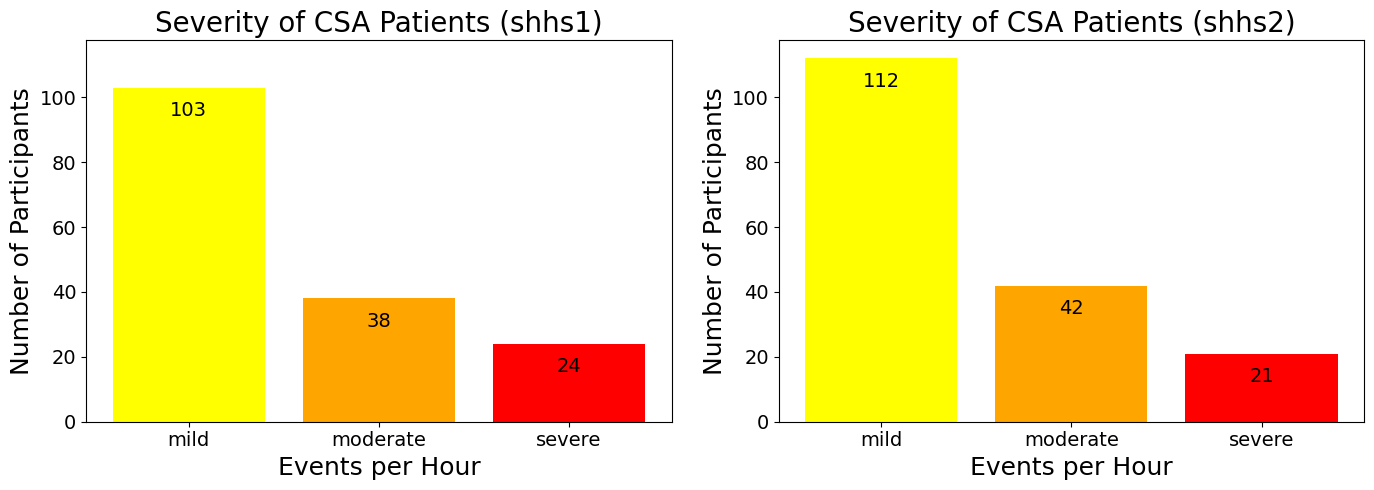

In [9]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 5), sharey=True)
datasets = [csa_1, csa_2]
titles = ['Severity of CSA Patients (shhs1)', 'Severity of CSA Patients (shhs2)']
bins = [5, 15, 30, np.inf]
bin_labels = ['mild', 'moderate', 'severe']
colors = ['yellow', 'orange', 'red']

for ax, data, title in zip(axes, datasets, titles):
    counts, _ = np.histogram(data['ahi_c0h4'], bins=bins)
    bars = ax.bar(bin_labels, counts, color=colors)

    ax.set_xlabel('Events per Hour', fontsize=18)
    ax.set_ylabel('Number of Participants', fontsize=18)
    ax.set_title(title, fontsize=20)

    # Adjust tick font sizes
    ax.tick_params(axis='both', labelsize=14)

    # Annotate each bar with its count
    for bar in bars:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width() / 2, height - 10, str(int(height)),
                ha='center', va='bottom', fontsize=14)

# Ensure the second chart's y-axis displays the ticks
axes[1].tick_params(axis='y', which='both', left=True, labelleft=True)

plt.subplots_adjust(right=0.95, wspace=10)
plt.tight_layout()
plt.savefig('Severity of CSA Patients.jpg', format='jpg', dpi=300)
plt.show()